In [114]:
import json
import numpy as np
import matplotlib.pyplot as plt
 
f = open('intersections_data.json')
data = json.load(f)

In [115]:
f = open('flow.json')
flow = json.load(f)

In [116]:
len(flow)

2021

In [117]:
for road in data['roads']:
    print(road)

{'id': 'road_0_1_0', 'points': [{'x': -300, 'y': 0}, {'x': 0, 'y': 0}], 'lanes': [{'width': 3, 'maxSpeed': 11.11}, {'width': 3, 'maxSpeed': 11.11}], 'startIntersection': 'intersection_0_1', 'endIntersection': 'intersection_1_1'}
{'id': 'road_1_0_1', 'points': [{'x': 0, 'y': -300}, {'x': 0, 'y': 0}], 'lanes': [{'width': 3, 'maxSpeed': 11.11}, {'width': 3, 'maxSpeed': 11.11}], 'startIntersection': 'intersection_1_0', 'endIntersection': 'intersection_1_1'}
{'id': 'road_1_1_0', 'points': [{'x': 0, 'y': 0}, {'x': 300, 'y': 0}], 'lanes': [{'width': 3, 'maxSpeed': 11.11}, {'width': 3, 'maxSpeed': 11.11}], 'startIntersection': 'intersection_1_1', 'endIntersection': 'intersection_2_1'}
{'id': 'road_1_1_1', 'points': [{'x': 0, 'y': 0}, {'x': 0, 'y': 300}], 'lanes': [{'width': 3, 'maxSpeed': 11.11}, {'width': 3, 'maxSpeed': 11.11}], 'startIntersection': 'intersection_1_1', 'endIntersection': 'intersection_1_2'}
{'id': 'road_1_1_2', 'points': [{'x': 0, 'y': 0}, {'x': -300, 'y': 0}], 'lanes': [{'wi

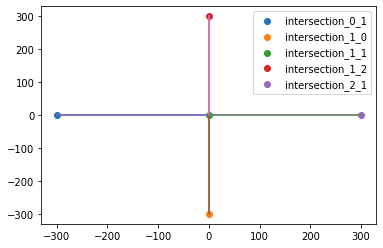

In [118]:
fig,ax = plt.subplots()
for intersection in data['intersections']:
    ax.scatter(*intersection['point'].values(),label=intersection['id'])
    ax.legend()
for road in data['roads']:
    points = np.array([list(p.values()) for p in road['points']])
    X = points[:,0]
    Y = points[:,1]
    ax.plot(X,Y)

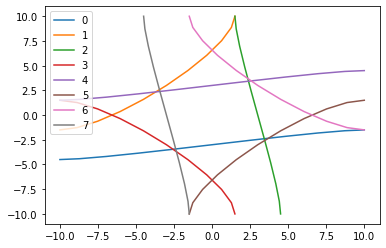

In [123]:
fig,ax = plt.subplots()
for count,roadLink in enumerate(data['intersections'][2]['roadLinks']):
    points = np.array([list(p.values()) for p in roadLink['laneLinks'][0]['points']])
    X = points[:,0]
    Y = points[:,1]
    ax.plot(X,Y,label=f'{count}')
ax.legend()

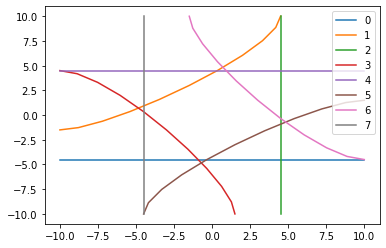

In [122]:
fig,ax = plt.subplots()
for count,roadLink in enumerate(data['intersections'][2]['roadLinks']):
    points = np.array([list(p.values()) for p in roadLink['laneLinks'][1]['points']])
    X = points[:,0]
    Y = points[:,1]
    ax.plot(X,Y,label=f'{count}')

ax.legend()

In [125]:
for roadLink in data['intersections'][2]['roadLinks']:
    print(roadLink['type'],roadLink['startRoad'],roadLink['endRoad'])

go_straight road_0_1_0 road_1_1_0
turn_left road_0_1_0 road_1_1_1
go_straight road_1_0_1 road_1_1_1
turn_left road_1_0_1 road_1_1_2
go_straight road_2_1_2 road_1_1_2
turn_left road_2_1_2 road_1_1_3
turn_left road_1_2_3 road_1_1_0
go_straight road_1_2_3 road_1_1_3


In [126]:
class ROAD:
    def __init__(self):
        self.cars = []
    
    def append_car(self,car):
        self.cars.append(car)

In [132]:
class CAR:
    def __init__(self,car):
        self.route = car['route']
        self.time = car['startTime'] 

In [133]:
road1 = ROAD()
road2 = ROAD()

In [134]:
for car in flow:
    c = CAR(car)
    if c.route[0] == 'road_0_1_0' or c.route[0] == 'road_2_1_2':
        road1.append_car(c)
    if c.route[0] == 'road_1_0_1' or c.route[0] == 'road_1_2_3':
        road2.append_car(c)

(1013, 1008)